## Курсовая работа №2. Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

### 2.0 Определение периода анализа и обоснование выбора

Будем анализировать паблик *Skillbox* и его посты на протяжении периода 01.12.2019 - 31.05.2020. Такой период выбран исходя из следующих положений:

* Декабрь выбран потому, что это стартовый период для новогодних скидок и распродаж. Исходя из результатов анализа первой курсовой можем сказать, что именно этот период характеризуется подъёмом числа учащихся на любых курсах.
* Январь - пиковое значение для событий декабря. Завершение праздников, постпраздничное "послевкусие". И к концу января как раз, по логике, должны заканчиваться самые крупные скидки.
* Февраль - относительно заурядный период. Результаты его анализа должны дать нам описание *спокойного* состояния, до начала последствий COVID-19.
* Март и прель - тесно связанные между собой периоды. В марте у COVID-19 всплывают первые последствия, которые сильно затрагивают сферу обучения. Апрель - продолжение государственных экспериментов, популяризация дистанционного обучения. Это даёт повод для небольших изменений основного стратегического вектора в SMM.
* Май - конец конец учебного года. Гипотетически, реклама должна увеличиться в темпах.

Кроме того, что месяцы выбранного периода имеют собственное значение в системе, они также позволят рассмотреть темпы развития SMM-отдела и взаимодействия с пользователями в совокупности с динамикой всего выбранного периода.

### 2.0.1 Выгрузка постов

In [1]:
#import requests
#
#def getjson(url):
#    response = requests.get(url)
#    response = response.json()
#    return response

In [2]:
#vk_token = 'some_token'

In [3]:
#from datetime import datetime, timedelta
#k = -1
#posts = list()
#while True:
#    k += 1
#    url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + f'&owner_id=-66669811&offset={k}&count=1&v=5.92'
#    response = getjson(url)
#    try:
#        it = response['response']["items"][0]
#    except KeyError:
#        k -= 1
#        continue
#    date = it['date']
#    date = (datetime.fromtimestamp(date) - timedelta(hours=0)).strftime('%Y-%m-%d %H:%M:%S')
#    it['date'] = date
#    if date >= '2020-06-01':
#        print(f"Progress {date}")
#        continue
#    elif date < '2019-12-01':
#        break
#    else:
#        posts.append(it)
#        print(f"Progress {date}")

In [4]:
#d_posts = {i:posts[i] for i in range(len(posts))}

In [5]:
#import json
#with open("Data/posts.json", "w") as f:
#    json.dump(d_posts, f)

In [6]:
import json
posts = None
with open("Data/posts.json", "r") as f:
    posts = json.load(f)

In [7]:
posts = list(posts.values())

Посмотрим на структуру поста.

In [8]:
posts[0]

{'id': 67679,
 'from_id': -66669811,
 'owner_id': -66669811,
 'date': '2020-05-31 12:22:41',
 'marked_as_ads': 0,
 'post_type': 'post',
 'text': 'Готовы продолжить изучать HTML? Тогда ловите новый комплект тегов!\n\nПишите в комментариях, если хотите чаще видеть эту рубрику.\nА пока смотрите карточки!\n\n#Учим_HTML #Skillbox_программирование',
 'attachments': [{'type': 'photo',
   'photo': {'album_id': -7,
    'date': 1590916961,
    'id': 457500209,
    'owner_id': -66669811,
    'has_tags': False,
    'access_key': '79ac35fd853c38f9c7',
    'sizes': [{'height': 130,
      'url': 'https://sun9-14.userapi.com/c206724/v206724127/12ffbc/7MQIxFTXYn8.jpg',
      'type': 'm',
      'width': 104},
     {'height': 163,
      'url': 'https://sun9-48.userapi.com/c206724/v206724127/12ffc1/qdF3J8q1TNE.jpg',
      'type': 'o',
      'width': 130},
     {'height': 250,
      'url': 'https://sun9-26.userapi.com/c206724/v206724127/12ffc2/OkcnwumFnTI.jpg',
      'type': 'p',
      'width': 200},
     

In [9]:
posts[0].keys()

dict_keys(['id', 'from_id', 'owner_id', 'date', 'marked_as_ads', 'post_type', 'text', 'attachments', 'post_source', 'comments', 'likes', 'reposts', 'views', 'is_favorite'])

Таким образом, можем выделить ключевые признаки, которые будут использоваться в дальнейшем анализе:
1. Дата публикации
2. Текст публикации
3. Комментарии
4. Лайки
5. Репосты
6. Просмотры

Также следует рассмотреть признак вложений - выяснить, какие бывают типы и рассмотреть их локальные признаки.<br>
Обозначим, что от признаков 3-6 нам понадобятся только их счётчики - параметр `count`.

In [10]:
att_types = {}
for p in posts:
    for a in p['attachments']:
        if not a['type'] in att_types:
            att_types[a['type']] = a

In [11]:
att_types.keys()

dict_keys(['photo', 'poll', 'video', 'link', 'doc', 'podcast'])

Видим, что к постам прикладывались фото, опросы, видео, ссылки, документы и подкасты. Взглянем на структуру этих вложений.

In [12]:
for key, val in att_types.items():
    print('\n', key, '\n')
    for k, v in val[key].items():
        print(f'{k}:{v}')


 photo 

album_id:-7
date:1590916961
id:457500209
owner_id:-66669811
has_tags:False
access_key:79ac35fd853c38f9c7
sizes:[{'height': 130, 'url': 'https://sun9-14.userapi.com/c206724/v206724127/12ffbc/7MQIxFTXYn8.jpg', 'type': 'm', 'width': 104}, {'height': 163, 'url': 'https://sun9-48.userapi.com/c206724/v206724127/12ffc1/qdF3J8q1TNE.jpg', 'type': 'o', 'width': 130}, {'height': 250, 'url': 'https://sun9-26.userapi.com/c206724/v206724127/12ffc2/OkcnwumFnTI.jpg', 'type': 'p', 'width': 200}, {'height': 400, 'url': 'https://sun9-70.userapi.com/c206724/v206724127/12ffc3/lp0fX3fPK0w.jpg', 'type': 'q', 'width': 320}, {'height': 638, 'url': 'https://sun9-2.userapi.com/c206724/v206724127/12ffc4/4Q02QbU4jN8.jpg', 'type': 'r', 'width': 510}, {'height': 75, 'url': 'https://sun9-39.userapi.com/c206724/v206724127/12ffbb/TiAMKsoDrTA.jpg', 'type': 's', 'width': 60}, {'height': 1350, 'url': 'https://sun9-54.userapi.com/c206724/v206724127/12ffc0/AcDwISmr2lc.jpg', 'type': 'w', 'width': 1080}, {'height': 

Фотографии сами по себе не несут ценности, поскольку здесь будет нужен самостоятельный анализ контента. Это же относится ко всем остальным вложениям, кроме опросов. В них нам важны количество проголосовавших и количество вариантов ответа (на всякий случай).

Теперь нам нужно сформировать словари, в который войдут необходимые параметры в виде ключа и множество их значений в качестве списка, являющегося значением ключа.

In [13]:
import re # для хештегов

In [14]:
temp = re.compile(r"#[\wА-Яа-яЁё_]+")

In [15]:
df = dict.fromkeys(['id', 'date', 'time', 'text_len',
                    'attachments_num', 'hashtag','view',
                    'comment', 'like','repost',
                    'poll_votes', 'poll_answers'])

In [16]:
for i in df:
    df[i] = list()

In [17]:
posts[0]

{'id': 67679,
 'from_id': -66669811,
 'owner_id': -66669811,
 'date': '2020-05-31 12:22:41',
 'marked_as_ads': 0,
 'post_type': 'post',
 'text': 'Готовы продолжить изучать HTML? Тогда ловите новый комплект тегов!\n\nПишите в комментариях, если хотите чаще видеть эту рубрику.\nА пока смотрите карточки!\n\n#Учим_HTML #Skillbox_программирование',
 'attachments': [{'type': 'photo',
   'photo': {'album_id': -7,
    'date': 1590916961,
    'id': 457500209,
    'owner_id': -66669811,
    'has_tags': False,
    'access_key': '79ac35fd853c38f9c7',
    'sizes': [{'height': 130,
      'url': 'https://sun9-14.userapi.com/c206724/v206724127/12ffbc/7MQIxFTXYn8.jpg',
      'type': 'm',
      'width': 104},
     {'height': 163,
      'url': 'https://sun9-48.userapi.com/c206724/v206724127/12ffc1/qdF3J8q1TNE.jpg',
      'type': 'o',
      'width': 130},
     {'height': 250,
      'url': 'https://sun9-26.userapi.com/c206724/v206724127/12ffc2/OkcnwumFnTI.jpg',
      'type': 'p',
      'width': 200},
     

In [18]:
for i, el in enumerate(posts):
    id_ = i
    date, time = el["date"].split()
    text = el["text"]
    text_len = len(text)
    hashtags = temp.findall(text)
    view = el["views"]["count"]
    comment = el["comments"]["count"]
    like = el["likes"]["count"]
    repost = el["reposts"]["count"]
    attachments = el["attachments"]
    attachments_num = len(attachments)
    poll_votes = 0
    poll_answers = 0
    for a in attachments:
        if a["type"] == "poll":
            answers = a["poll"]["answers"]
            poll_answers = len(answers)
            for an in answers:
                poll_votes += an["votes"]
    for h in hashtags:
        df["id"].append(id_)
        df["date"].append(date)
        df["time"].append(time)
        df["text_len"].append(text_len)
        df["hashtag"].append(h[1:])
        df["view"].append(view)
        df["comment"].append(comment)
        df["like"].append(like)
        df["repost"].append(repost)
        df["attachments_num"].append(attachments_num)
        df["poll_votes"].append(poll_votes)
        df["poll_answers"].append(poll_answers)

In [19]:
df

{'id': [0,
  0,
  1,
  2,
  2,
  2,
  3,
  3,
  4,
  4,
  5,
  5,
  6,
  7,
  7,
  8,
  9,
  9,
  10,
  10,
  11,
  11,
  12,
  12,
  13,
  14,
  14,
  15,
  16,
  16,
  17,
  18,
  18,
  19,
  20,
  21,
  21,
  22,
  22,
  23,
  23,
  24,
  24,
  25,
  26,
  27,
  28,
  29,
  29,
  30,
  31,
  31,
  32,
  32,
  33,
  34,
  35,
  35,
  36,
  36,
  37,
  37,
  38,
  38,
  39,
  39,
  40,
  41,
  41,
  42,
  43,
  43,
  44,
  44,
  45,
  46,
  46,
  47,
  47,
  48,
  48,
  49,
  49,
  50,
  51,
  52,
  52,
  53,
  54,
  55,
  56,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  62,
  63,
  64,
  64,
  64,
  65,
  66,
  66,
  67,
  68,
  69,
  70,
  70,
  71,
  72,
  72,
  73,
  73,
  74,
  74,
  75,
  75,
  75,
  76,
  76,
  77,
  78,
  79,
  79,
  80,
  80,
  81,
  82,
  82,
  83,
  83,
  84,
  84,
  85,
  86,
  87,
  88,
  88,
  89,
  89,
  90,
  91,
  91,
  91,
  92,
  92,
  93,
  93,
  94,
  94,
  94,
  95,
  96,
  97,
  97,
  98,
  99,
  99,
  100,
  100,
  101,
  101,
  102,
  102,
  10

In [20]:
import pandas as pd
df = pd.DataFrame(df)

In [21]:
df.head()

,id,date,time,text_len,attachments_num,hashtag,view,comment,like,repost,poll_votes,poll_answers
0,0,2020-05-31,12:22:41,192,6,Учим_HTML,30694,25,233,31,0,0
1,0,2020-05-31,12:22:41,192,6,Skillbox_программирование,30694,25,233,31,0,0
2,1,2020-05-30,13:39:18,678,1,В_Закладки_Skillbox,21371,11,70,5,0,0
3,2,2020-05-29,12:29:38,746,1,designworkout,21660,0,77,12,0,0
4,2,2020-05-29,12:29:38,746,1,Readymag,21660,0,77,12,0,0


Преобразуем параметры `comment`, `like`, `repost`, `poll_votes` - вместо количественной оценки параметра посчитаем их долю относительно параметра просмотра. А чтобы числа были удобны для просмотра, будем домножать их на некоторое крупное число.

In [22]:
conv = lambda x, y: round((x/y) * 1000, 2)
df.comment = conv(df.comment, df.view)
df.like = conv(df.like, df.view)
df.repost = conv(df.repost, df.view)
df.poll_votes = conv(df.poll_votes, df.view)

Приведём все хештеги к нижнему регистру во избежание путаницы

In [23]:
df.hashtag = df.hashtag.apply(lambda x: x.lower())
df.head()

,id,date,time,text_len,attachments_num,hashtag,view,comment,like,repost,poll_votes,poll_answers
0,0,2020-05-31,12:22:41,192,6,учим_html,30694,0.81,7.59,1.01,0.0,0
1,0,2020-05-31,12:22:41,192,6,skillbox_программирование,30694,0.81,7.59,1.01,0.0,0
2,1,2020-05-30,13:39:18,678,1,в_закладки_skillbox,21371,0.51,3.28,0.23,0.0,0
3,2,2020-05-29,12:29:38,746,1,designworkout,21660,0.00,3.55,0.55,0.0,0
4,2,2020-05-29,12:29:38,746,1,readymag,21660,0.00,3.55,0.55,0.0,0


In [24]:
def scale(series, mean = None):
    if mean is None:
        mean = series.mean()
    k = 100 / mean
    return series * k

In [25]:
for i in list(df.columns)[7:10]:
    df[i] = scale(df[i])
df["poll_votes"] = scale(df["poll_votes"], mean = df[df["poll_votes"] > 0].poll_votes.mean())

In [26]:
df.head()

,id,date,time,text_len,attachments_num,hashtag,view,comment,like,repost,poll_votes,poll_answers
0,0,2020-05-31,12:22:41,192,6,учим_html,30694,139.092530,173.322677,193.936708,0.0,0
1,0,2020-05-31,12:22:41,192,6,skillbox_программирование,30694,139.092530,173.322677,193.936708,0.0,0
2,1,2020-05-30,13:39:18,678,1,в_закладки_skillbox,21371,87.576778,74.900972,44.163805,0.0,0
3,2,2020-05-29,12:29:38,746,1,designworkout,21660,0.000000,81.066601,105.609099,0.0,0
4,2,2020-05-29,12:29:38,746,1,readymag,21660,0.000000,81.066601,105.609099,0.0,0


In [27]:
l = list(df.columns.copy())
l.remove("hashtag")
df_no_hash = df.loc[:, l].sort_values("date").drop_duplicates().reset_index()

In [28]:
del df_no_hash['index']
del df_no_hash['id']

In [29]:
df_no_hash.head()

,date,time,text_len,attachments_num,view,comment,like,repost,poll_votes,poll_answers
0,2019-12-01,13:00:01,285,10,45409,68.687669,173.094320,211.218197,0.0,0
1,2019-12-02,18:10:00,384,10,31376,49.798560,163.046629,103.688933,0.0,0
2,2019-12-02,12:26:53,574,1,19579,290.205403,121.257367,97.928437,0.0,0
3,2019-12-02,15:03:59,617,1,13539,0.000000,40.419122,0.000000,0.0,0
4,2019-12-03,10:00:05,414,1,15760,315.963279,52.065310,36.483143,0.0,0


В результате мы получили две версии одной таблицы. `df` - это таблица, где информация об одном и том же посте повторяется в зависимости от количества хештегов данного поста. Она нужна будет для анализа по рубрикам. А таблица `df_no_hash` не содержит дубликатов и колонки хештега там тоже нет. Она будет использоваться для отслеживания общей динамики по разным характеристикам.

### 2.1 Общий анализ зависимостей

Построим матрицу корреляций.

In [30]:
import seaborn as sns

In [31]:
corr_m = df.loc[:, 'text_len':].corr()

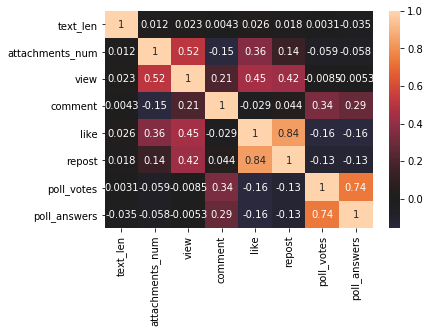

In [32]:
sns.heatmap(corr_m, center=0, annot=True)

Корреляционная матрица нам показывает следующее:
1. Длина текста материала не имеет значения, она  не коррелирует ни с одним показателем.
2. Присутствует сильная положительная корреляция между долей лайков и репостов.
3. Количество просмотров достаточно сильно коррелирует с количеством вложений. Разумно обосновывать это тем, что наличие визуального материала привлекает больше внимания к посту.
4. Также количество просмотртров тесно связано с долей лайков и репостов, и в меньшей мере - комментариев.
5. Примечательная зависимость присутствует между долями комментариев и голосов вопросах. Скорее всего, это происходит потому, что некоторые пользователи, выражая своё мнение в опросе, хотят уточнить его в комментариях.

<br>\* Корреляция между долей голосов пока не ясна, скорее всего, она связана с тем, что большинство постов в выборке не содержат опросов и корреляция упирается в то, что нличие голосов зависит, в первую очередь, от наличия самого опроса.


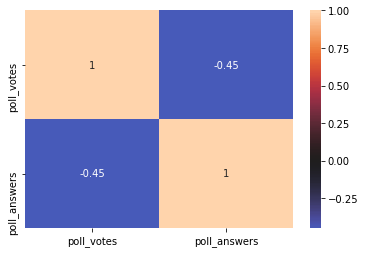

In [33]:
corr_m = df[df.poll_answers > 0].loc[:, 'poll_votes':].corr()
sns.heatmap(corr_m, center=0, annot=True)

In [34]:
df

,id,date,time,text_len,attachments_num,hashtag,view,comment,like,repost,poll_votes,poll_answers
0,0,2020-05-31,12:22:41,192,6,учим_html,30694,139.092530,173.322677,193.936708,0.000000,0
1,0,2020-05-31,12:22:41,192,6,skillbox_программирование,30694,139.092530,173.322677,193.936708,0.000000,0
2,1,2020-05-30,13:39:18,678,1,в_закладки_skillbox,21371,87.576778,74.900972,44.163805,0.000000,0
3,2,2020-05-29,12:29:38,746,1,designworkout,21660,0.000000,81.066601,105.609099,0.000000,0
4,2,2020-05-29,12:29:38,746,1,readymag,21660,0.000000,81.066601,105.609099,0.000000,0
5,2,2020-05-29,12:29:38,746,1,в_закладки_skillbox,21660,0.000000,81.066601,105.609099,0.000000,0
6,3,2020-05-28,12:31:26,424,2,дизайн_баттл,32718,487.682452,30.599787,11.520993,87.548534,2
7,3,2020-05-28,12:31:26,424,2,skillbox_дизайн,32718,487.682452,30.599787,11.520993,87.548534,2
8,4,2020-05-27,15:27:20,509,1,skillboxontv,21337,104.748696,93.169502,63.365459,0.000000,0
9,4,2020-05-27,15:27:20,509,1,конкурс_skillbox,21337,104.748696,93.169502,63.365459,0.000000,0


Теперь наблюдается совершенно другая картина. Если в первом случае связь между `poll_votes` и `poll_answers` была почти что прямо пропорцональной за счёт преимущественно отсутствия опросов в выборке, то здесь видим, что есть умеренная обратно пропорциональная корреляция: тенденция такова, что чем больше вариантов ответа, тем меньше проголосовавших.

### 2.2 Анализ по рубрикам

In [35]:
count = df.groupby("hashtag").count().loc[:, "id":"id"]
count

,id
hashtag,
191970,1
7fffd4,1
aic_skillbox,1
avocard,1
cg_skillbox,1
cовет_препода_skillbox,2
design_battle_skillbox,4
designworkout,1
dominos_skillbox,1


Видим, что хештегов всего 101 (считая 16-иричные записи цветов). Однако видим, что среди них большинство хештегов не повторяются. Для этого выберем конкретное число. Пусть это будет 5. Сейчас нам нужно будет отсеять все остальные хештеги.

In [36]:
count[count["id"] > 5]

,id
hashtag,
skillbox_вдохновляет,14
skillbox_дизайн,77
skillbox_маркетинг,41
skillbox_программирование,45
skillbox_управление,23
айдентика_skillbox,6
в_закладки_skillbox,56
кант_поймет,6
конкурс_skillbox,10


Видим, что таких рубрик всего 14. Запомним их.

In [37]:
rubrics = list(count[count["id"] > 5].index)

In [38]:
rubrics

['skillbox_вдохновляет',
 'skillbox_дизайн',
 'skillbox_маркетинг',
 'skillbox_программирование',
 'skillbox_управление',
 'айдентика_skillbox',
 'в_закладки_skillbox',
 'кант_поймет',
 'конкурс_skillbox',
 'лекторий_skillbox',
 'марафон_skillbox',
 'расписание_skillbox',
 'совет_препода_skillbox',
 'статья_skillbox']

Теперь построим графики по каждой характеристике каждой рубрики. Также введём новую метрику: среднее арифметическое среди медиан всех характеристик и определим функцию для её вычисления.

In [39]:
import numpy as np
def av_med(df):
    cols = ["comment", "like", "repost"]
    meds = []
    if df.shape[0] != df[df["poll_votes"] == 0].shape[0]:
        meds.append(df[df["poll_votes"] != 0]["poll_votes"].median())
    for i in cols:
        meds.append(df[i].mean())
    return np.mean(meds)

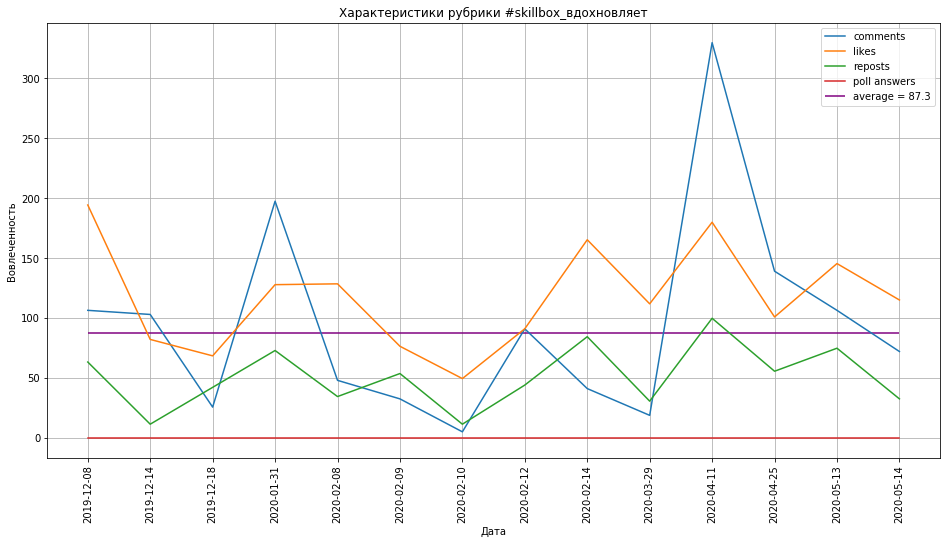

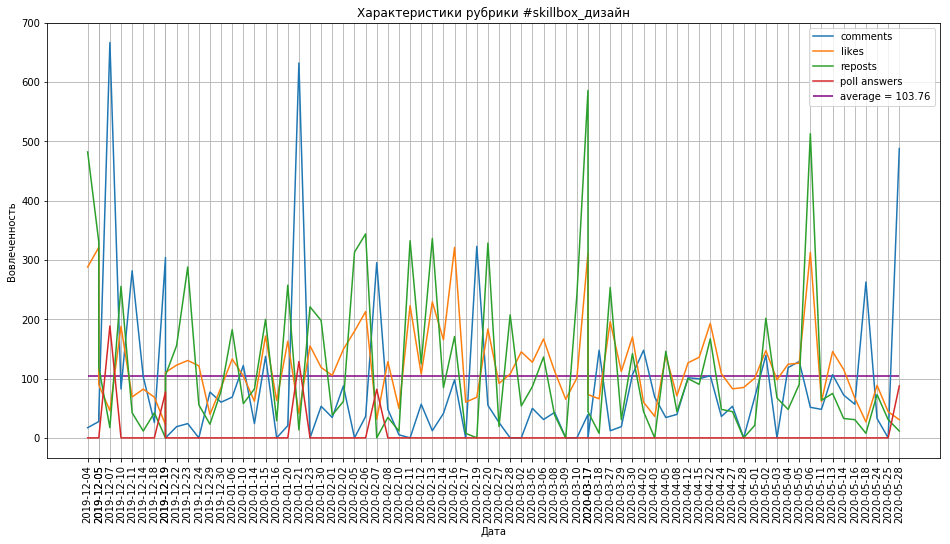

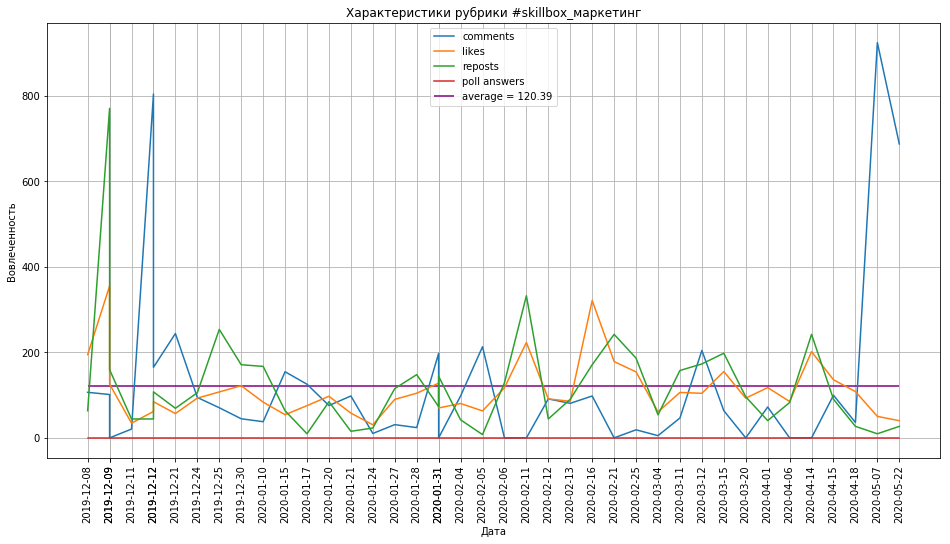

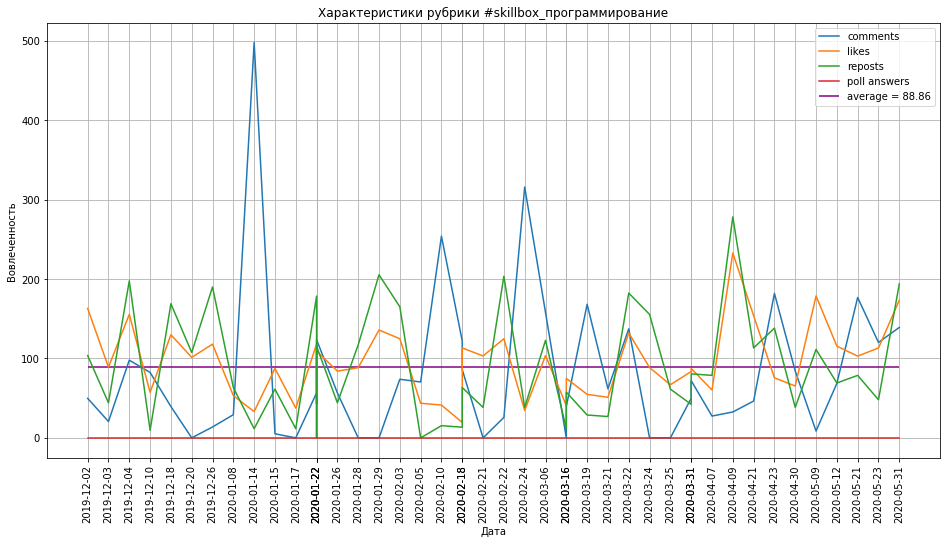

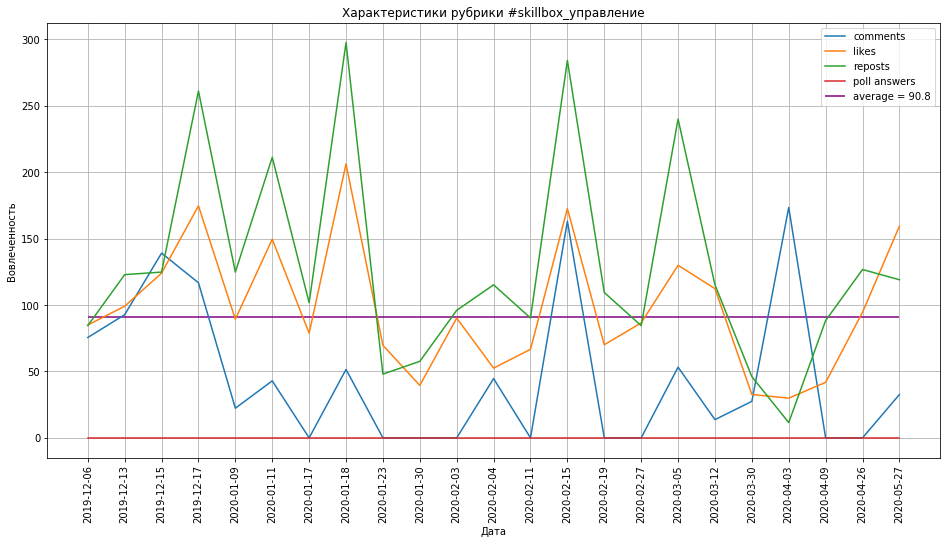

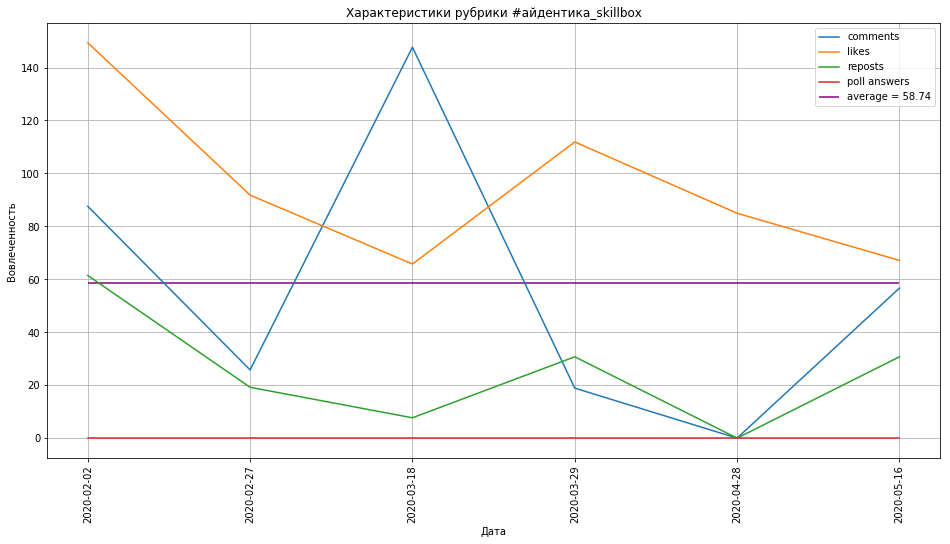

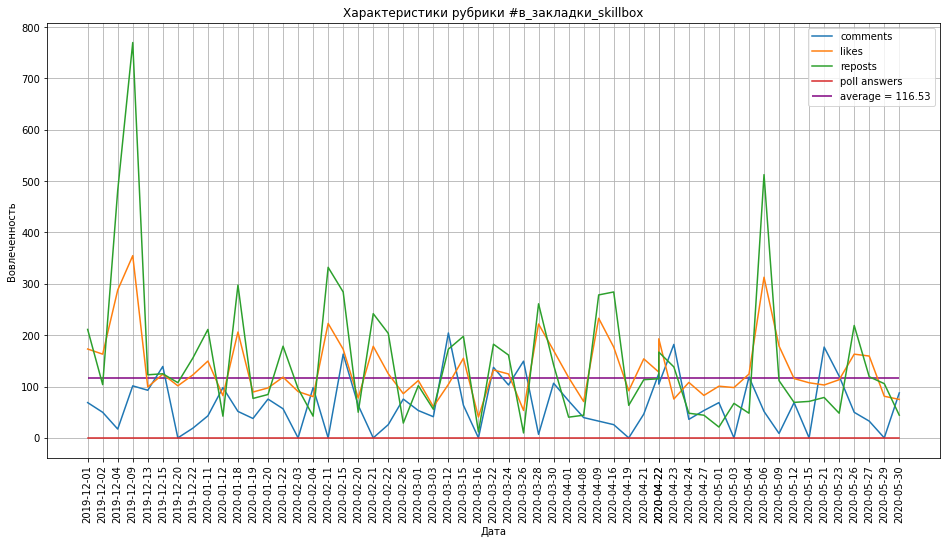

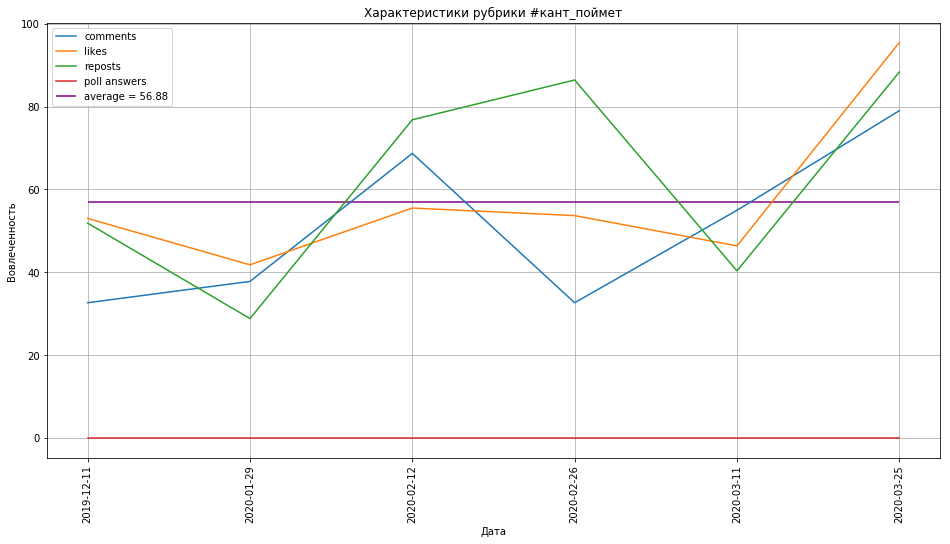

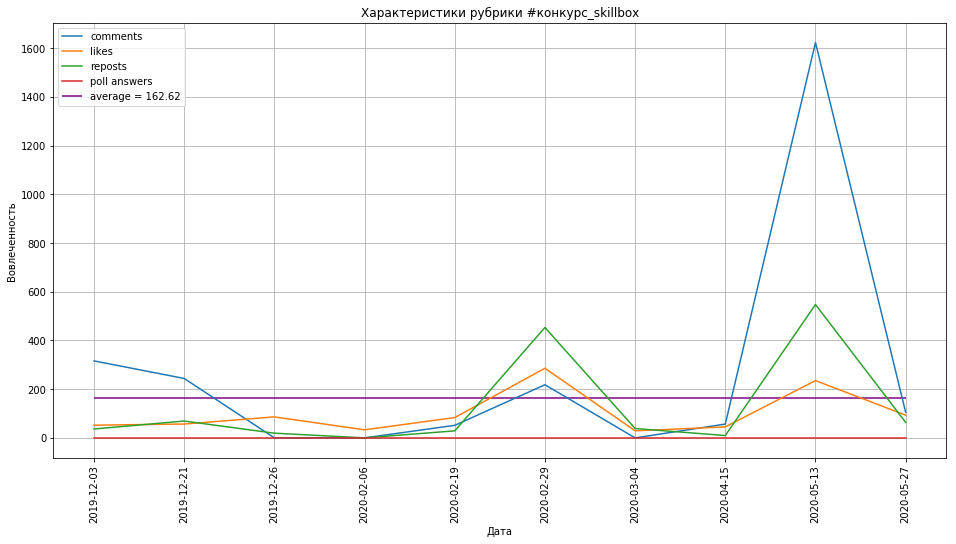

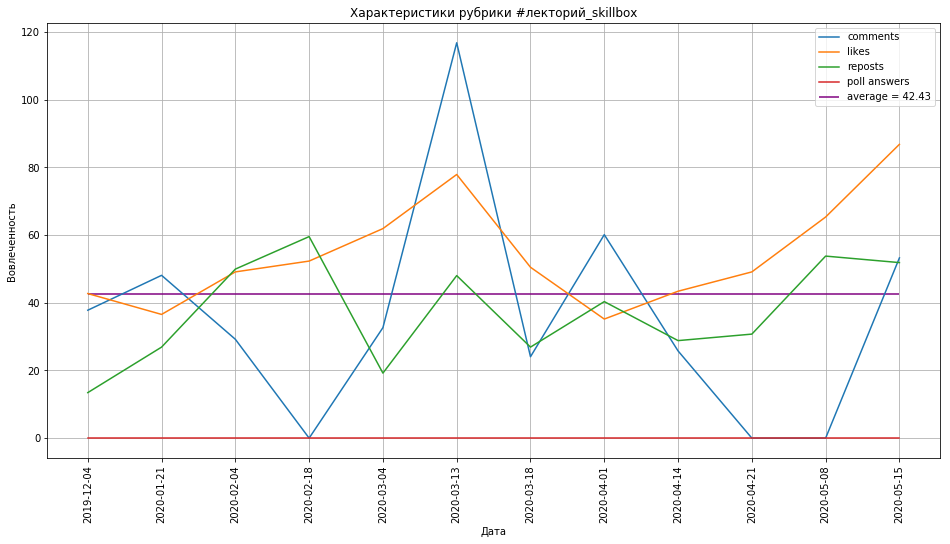

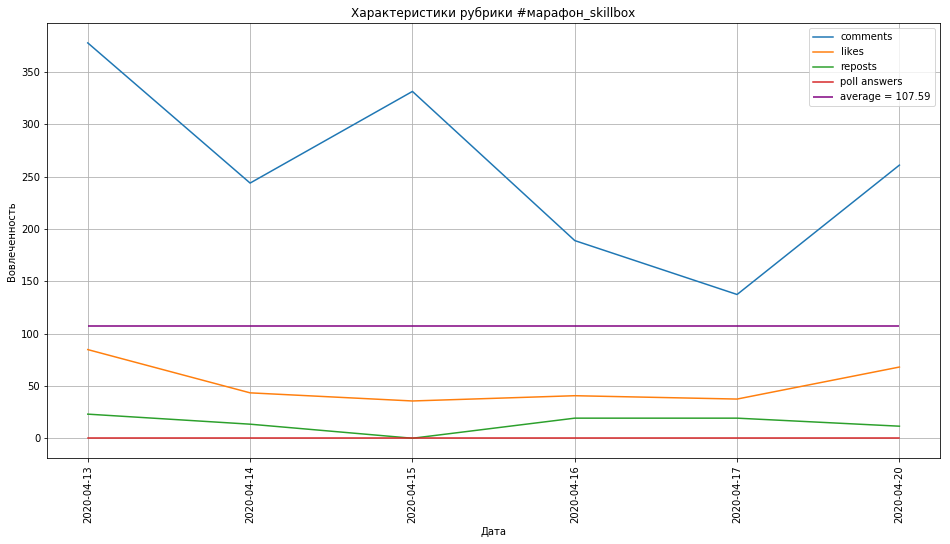

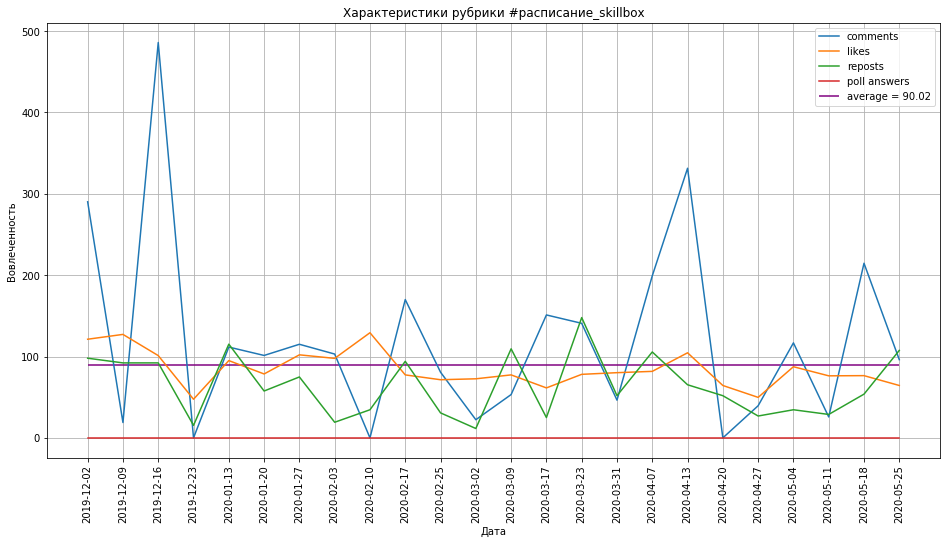

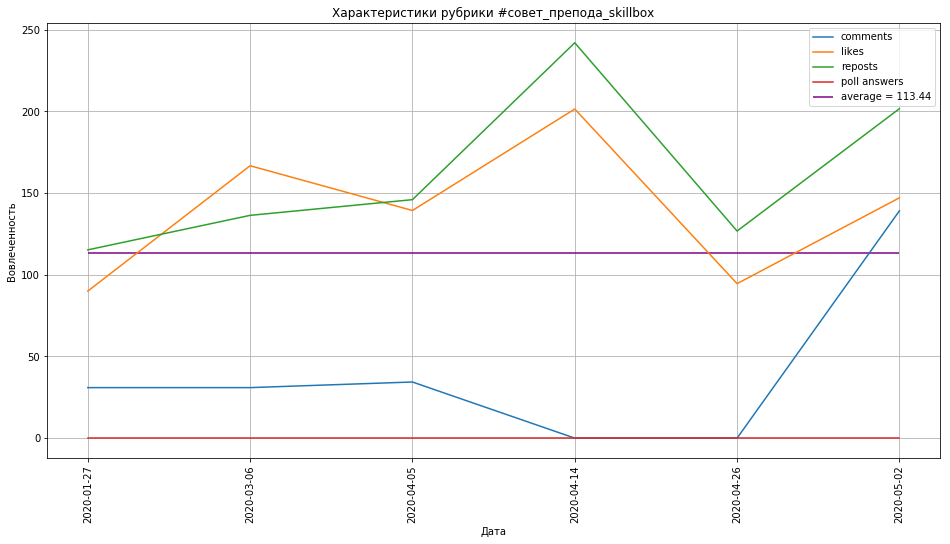

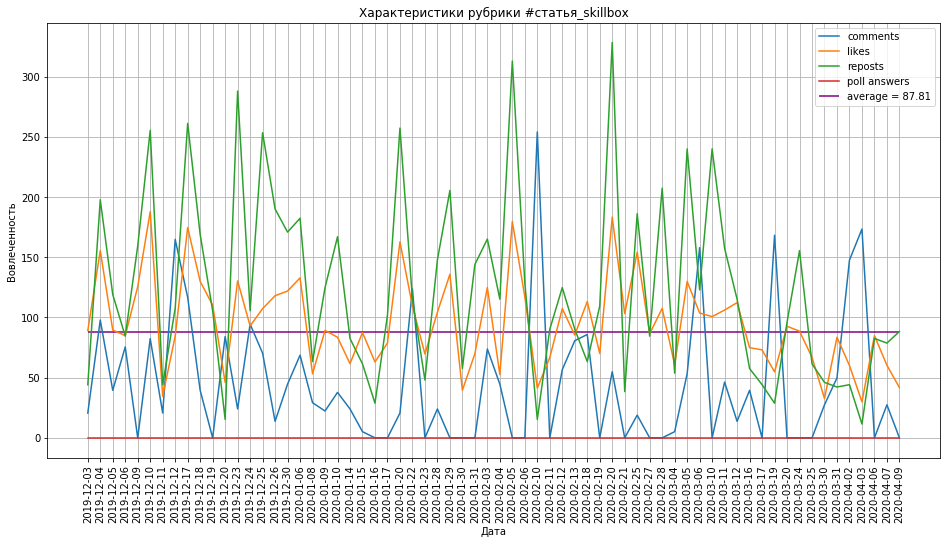

In [40]:
from matplotlib import pyplot as plt
df = df.sort_values("date")
for ind, r in enumerate(rubrics):
    current_df = df[df["hashtag"] == r]
    xticks = current_df["date"]
    am = av_med(current_df)
    fig, subplot = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.plot(xticks, current_df["comment"], label = "comments")
    plt.plot(xticks, current_df["like"], label = "likes")
    plt.plot(xticks, current_df["repost"], label = "reposts")
    plt.plot(xticks, current_df["poll_votes"], label = "poll answers")
    plt.hlines(am, list(xticks)[0], list(xticks)[-1], color = "purple", label = f"average = {round(am, 2)}")
    plt.xticks(xticks, rotation = "vertical")
    plt.xlabel("Дата")
    plt.ylabel("Вовлеченность")
    plt.legend()
    plt.grid()
    plt.title(f"Характеристики рубрики #{r}")
    plt.savefig(f"Created Data/rubrics_{ind+1}_{r}.png", bbox_inches = 'tight')
    plt.show()

Итак, мы нарисовали графики, которые показывают уровень вовлечённости аудитории относительно некоего среднего значения, которое было определено в функции `scale`. Мы исходим из того, что изначально определили пропорциональную связь между числом 100 и средней вовлеченностью относительно каждой из характеристик. Простыми словами: если у конкретного поста ось вовлеченности по какому-то из параметров принимает значение 100, значит, по этому параметру вовлеченность аудитории близка к среднему значению. Из этого следует, что визуально чем больше максимум оси вовлечённости, тем больше вовлеченность. И важно, чтобы такие максимумы были часты - тогда это действительно будет успехом.<br>
* Первая общая наблюдаемая закономерность заключается в том, что наиболее неустойчивой характеристикой являются комментарии. Главная причина тому - возможность комментирования одним и тем же человеком неограниченное количество раз. А выводы, которые можно сделать на основе этих пиков, сводятся к тому, что тема определённого поста вызвала бурный интерес и насыщенные споры. При этом важно понимать, что в таких случаях повышается вовлеченность конкретных пользователей, а не всей аудитории в целом.
* В основном, графики повторяют друг друга по форме, т.е. локальные экстремумы приходятся почти всегда на одни посты. Расхождения иногда вызываются комментариями.
* Опросы встречаются только в рубрике #Skillbox_дизайн. По ним можно сказать, что на месте кажого опроса резко возрастает уровень комментариев, при этом уровень лайков и репостов падает.
* На примере конретных постов не просматривается временной тренд. Значения, которые функция принимает в разных точках, скорее хаотичны. Однако, чаще всего, наблюдаются последовательные смены "горок" и "ям". Т.е., если у поста `n` вовлеченность больше, чем у поста `n-1`, то вовлечённость у поста `n+1`, вероятнее всего, будет меньше, чем у `n`, и наоборот.

Перейдём к частным характеристикам. Определим, что рубрики, у которых средний параметр `am` принимает значение в диапазоне (85, 115) - будут считаться рубриками с *нормальным успехом*. Соответственно, `am` > 115 - это рубрика с *высоким успехом*, а `am` < 85 - с *низким успехом*.
<h4><font color = "red">Рубрики с низким успехом</font></h4>

* айдентика_skillbox;
* кант_поймёт;
* лекторий_skillbox.

<h4><font color = "orange">Рубрики с нормальным успехом</font></h4>

* skillbox_вдохновляет;
* skillbox_дизайн;
* skillbox_программирование;
* skillbox_управление;
* марафон_skillbox;
* расписание_skillbox;
* совет\_препода\_skillbox;
* статья_skillbox.

<h4><font color = "green">Рубрики с высоким успехом</font></h4>

* skillbox_маркетинг;
* в\_закладки\_skillbox;
* конкурс_skillbox.

Наиболее низкой популярностью обладает *лекторий_skillbox*, а наиболее высокой - *конкурс_skillbox*. Исходя из данных выше можно определить стратегию по количественному соотношению постов, а также придумать, как улучшить определённые характеристики каждой рубрики в отдельности. К примеру, из корреляционной матрицы мы выявили, что количество вложений положительно влияет на вовлеченность аудитории (на долю лайков). Допустим, можно добавить в рубрику *кант_поймёт* картинки с кратким содержанием подкаста или с цитатами и фотографией гостя. Или добавлять опросы по возможности в некоторые отделы. Допустим, если в *кант_поймёт* речь идёт о получении высшего образования, то у пользователя можно спросить о его отношении к этому. Так будет гарантировано необходимое количество голосов в опросе, и, скорее всего, начнутся обсуждения в комментарий. Хотя это снизит долю лайков и репостов, доля вовлечённости определённо увеличится.

### 2.3 Общий анализ

Теперь можно перейти к анализу динамики в локальных и глобальных периодах. Начнём с малого - определим зависимость вовлечённости пользователя от времени публикации. Для этого преобразуем время в категориальный признак - разобъём на 24 диапазона по часу и посмотрим на зависимость. Кроме того, следует ещё установить среднюю вовлечённость пользователя по показателям лайков, комментариев, опросов и репостов и тоже преобразовать в категориальный признак.<br>
Для начала вычислим среднюю вовлечённости по всей выборке и среди этих показателей определим среднее и стандартное отклонение.

In [41]:
df = df_no_hash

In [42]:
def count_mean(i):
    cols = ["comment", "like", "repost"]
    if df.loc[i, "poll_votes"] != 0:
        cols.append("poll_votes")
    cur_mean = np.mean(df.loc[i, cols])
    return cur_mean

In [43]:
means = []
for i in range(df.shape[0]):
    means.append(count_mean(i))

In [44]:
df["involvement"] = means

In [45]:
inv_mean = np.mean(means)
inv_std = np.std(means)

In [46]:
inv_std

79.86131650287531

In [47]:
inv_mean

99.52406760614818

Видим, что стандартное отклонение составляет 80% от среднего - это много. Поэтому будет правильнее вычислить отдельно отклонения в большую сторону и в меньшую.

In [48]:
def stdpn(args):
    args = np.array(args)
    mean = np.mean(args)
    args1 = args[args >= mean]
    args2 = args[args < mean]
    stdp = (((args1 - mean)**2).sum()/(len(args1) - 1))**(0.5)
    stdn = (((args2 - mean)**2).sum()/(len(args2) - 1))**(0.5)
    return [stdp, stdn]

In [49]:
inv_p, inv_n = stdpn(means)

In [50]:
inv_p

115.7535204026849

In [51]:
inv_n

46.77857803308588

Теперь у нас есть необходимые данные для построения диапазонов категориального  признака.

In [52]:
def diap(inv):
    ret = None
    if inv >= (inv_mean + inv_p * 2):
        ret = 5
    elif inv >= (inv_mean + inv_p):
        ret = 4
    elif inv >= (inv_mean - inv_n):
        ret = 3
    elif inv >= (inv_mean - inv_n * 2):
        ret = 2
    else:
        ret = 1
    return ret

In [53]:
df["inv_diap"] = df["involvement"].apply(diap)

Теперь обработаем время по похожему принципу

In [54]:
df.time.sort_values().min(), df.time.sort_values().max()

('10:00:02', '20:48:20')

Видим, что посты публикуются с 10 утра и до 9 вечера. Разобъём их на три крупных диапазона: с 10 до 14, с 14 до 18, и с 18 до 21.

In [55]:
def tf(t):
    ret = None
    if t < '14':
        ret = '10:00-14:00'
    elif t < '18':
        ret = '14:00-18:00'
    else:
        ret = '18:00-21:00'
    return ret

In [56]:
df["time_diap"] = df["time"].apply(tf)

In [57]:
from scipy.stats import spearmanr as qual_corr

In [58]:
qual_corr(df["time_diap"], df["inv_diap"])

C:\Games\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.14474090203512746, pvalue=0.01151838623404184)

Присутствует слабая отрицательная корреляция. Введём другие диапазоны времени и построим диаграмму рассеивания.

In [59]:
df["hour"] = df["time"].apply(lambda x: x[:2])

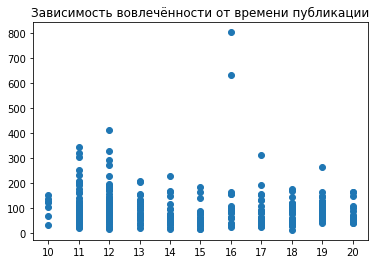

In [60]:
plt.scatter(df.sort_values("hour")["hour"], df.sort_values("hour")["involvement"])
plt.title("Зависимость вовлечённости от времени публикации")
plt.show()

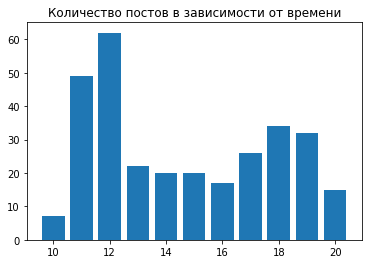

In [61]:
plt.bar([i for i in range(10, 21)], df.sort_values("hour").groupby("hour").count()["like"])
plt.title("Количество постов в зависимости от времени")
plt.show()

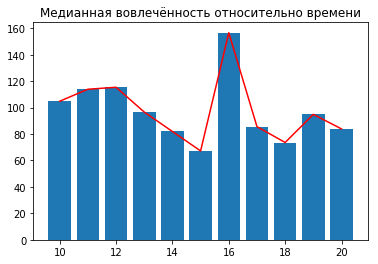

In [62]:
plt.bar([i for i in range(10, 21)], df.sort_values("hour").groupby("hour").mean()["involvement"])
plt.plot([i for i in range(10, 21)], df.sort_values("hour").groupby("hour").mean()["involvement"], color = "red")
plt.title("Медианная вовлечённость относительно времени")
plt.show()

Видим, что наибольшее количество постов делается в с 11 до 13 часов, и в этом диапазоне наблюдается большая средняя вовлечённость. Столбик на 16 часах - аномалия, вызванная двумя постами с чрезмерно высокой и из ряда вон выходящей вовлечённостью. А исходя из ранее полученного коэффициента Спирмена можем обобщить: чем позже выкладывается пост, тем меньше будет вовлечённость, А время с 11 до 13 часов - самое подходящее время для того, чтобы выкладывать посты. Наконец, сгруппируем посты по временному диапазону и посмотрим на медианную и среднюю вовлечённости.

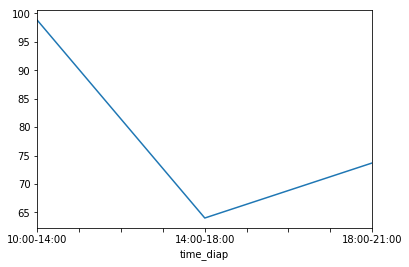

In [63]:
df.groupby("time_diap").median()["involvement"].plot()

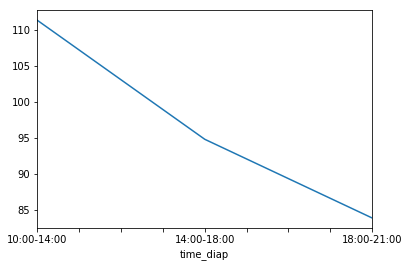

In [64]:
df.groupby("time_diap").mean()["involvement"].plot()

Видим, что в обеих случаях первый диапазон времени даёт максимальную вовлечённость. Избавимся от аномальных данных в диапазоне 16 часов и измерим эти показатели снова.

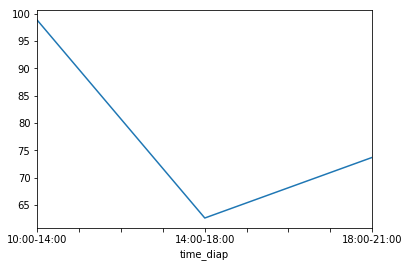

In [65]:
df[df["involvement"] < 600].groupby("time_diap").median()["involvement"].plot()

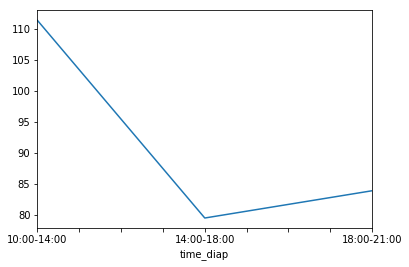

In [66]:
df[df["involvement"] < 600].groupby("time_diap").mean()["involvement"].plot()

Теперь уже ясно видно, что на втором месте по вовлечённости - диапазон 18:00-21:00.

И последнее. Проанализируем по периодам изменение метрик и посмотрим на динамику в течение 6-и месяцев.

In [67]:
df["month"] = df["date"].apply(lambda x: x[:7])

In [68]:
m_mean = dict(df.groupby("month").mean()["involvement"])

In [69]:
m_med = dict(df.groupby("month").median()["involvement"])

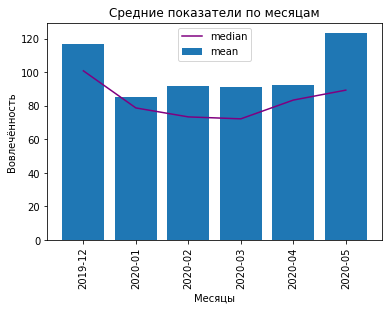

In [70]:
plt.bar(m_mean.keys(), m_mean.values(), label =  "mean")
plt.xticks(rotation = "vertical")
plt.plot(m_med.keys(), m_med.values(), color = "purple", label = "median")
plt.title("Средние показатели по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Вовлечённость")
plt.legend()
plt.show()

По данному графику можем сделать следующие выводы:
1. Наибольшими показателями вовлеченности в среднем обладает декабрь - предновогодний период, чего мы и ожидали;
2. С января по февраль график медианы убывает, вовлечённость падает. Так и должно было быть;
3. С марта по май график возрастает, в мае вовлечённость увеличивается очень сильно. Повышение вовлечённости в апреле, скорее всего, можно объяснить пандемией, а в мае прирост продолжился благодаря тому, что наступил еще и период отдыха. 